# Image Classification of Pnemounia presence with Deep Learning

## 1. Business Understanding

### (a) Introduction

Pneumonia is an infection that causes inflammation in one or both of the lungs and may be caused by a virus,bacteria,fungi or other germs.When pneumonia is suspected, a chest X_ray is often recommended as part of the diagnostic process.
A chest X-ray helps the doctor diagnose pneumonia and determine the exact location of the infection.X-ray images helps to confirms the presence of pneumonia by showing areas of opacity in the lungs,which are indicative of inflammation.
In the X-ray image, pneumonia is often seen as a white or gray patch(or patches),which represents the area of the lung affected by pneumonia. The rest of the lung appears darker on the X-ray image.The contrast allows the doctor to identify areas of pneumonia.However, while X-rays are a valuable tool in diagnosing pneumonia,they do have limitations.For instance, it's often difficult to diagnose pneumoia in people with pre-existing lung diseases since their lungs may already show abnormalities on the X-ray.Due to some of this limitations in diagnosing the presence of pnemonia, the Radiology department in conjuction with the Health Information Department(HIM) department have seen the need to employ data analysis to help them build a neural network that may help in the diagnosis of pneumonia.

The Radiolody Department in Kenyatta National Hospital(KNH) is equipped with state-of-the-art equipment.The department offers various specialized services to both adults and children,which include CT Scans,MRI(with sedation and anaesthesia), Ultrasound and Interventional Radiology.They carry out both non-vascular and vascular procedures such as image guided biopsies of the lungs among others.
On the other hand, the Health Information Management(HIM)department is responsible for collection, analysis and the protection of digital and traditional medical information vital to providing quality patient care.They ensure that data is properly stored, cleaned and made available for use.They also play a cricial role in ensuring that all data management practices comply with the various legal and ethical standards which includes things like patients privacy laws and regulation related to the storage of medical data.
The collaboration of this two departments is crucial in the effective running of KNH since the Radiology department generates vast amounts of data from various imaging procedures. This data needs to be properly managed to ensure it can be easily accessed and used by healthcare providers and this where the HIM Department comes in.

This project aims to develop a neural network model for the detection of pneumonia from chest X-ray images inorder to help the radiologist and other healthcare providers in Kenyatta National Hospital to make more accurate diagnoses by identifying patterns in X-ray images that may be difficult for humans to detect.By providing preliminary diagnosis,the model can save radiologists time,allowing them to focus on more complex cases, faster and more accurate diagnosis means that patients can receive treatment sooner,potentially leading to better outcomes.
This project represents an opportunity to leverage advanced neural network technology to improve healthcare delivery at Kenyatta National Hospital.

### (b) The Problem Statement

Pneumonia is a common lung infection caused by bacteria, a virus or fungi.It is a major cause of death among all age groups resulting in 2.56 million deaths worldwide in 2017. The diadnosis of pneumonia involves a physical exam followed by a chest X-ray. However, the interpretation of chest X-rays requires expert knowledge and can be time consuming.Morever, the accuracy of diagnosis can vary based on the experience and expertise of the radiologist.Since false diagnosis of pneumonia to escalated medical conditions,increased risk of infection and incorect treatment,there is a need for an automated, reliable and efficient method to interpret chest X-rays and diagnose pneumonia.
This project aims to develop a neural network model that can accurately detect pneumonia from chest X-rays images,thereby assisting radiologists in Kenyatta National Hospital in diagnosis,reducing the time taken for diagnosis and ultimately leading to timely treatment and improved patient outcomes.

### (c) Defining a Metric of Success

- **Model Performance**
This project will prioritize recall inorder to reduce the chances of the model to miss pneumonia cases and F1 score inorder to balance the trade off between precision and recall.
The model will be demeaned successfull if it can archieve a recall of atleast 80% and an F1 score of atleast 0.7

- **Cost Effectiveness**
This project will be deamened successfull if it can reduce the cost associated with pneumonia diagnostics by atleast 10%.This could be measured in terms of time spent by radiologists on diagnosing pneumonia or reduced hospitalization time due to earlier diagnostics.

- **Patient Outcomes**
The project will be deamened successful if it can improve user outcomes such as reduced mortality and morbidity rates among patients diagnosed with pneumonia.

- **Model Generalization**
This project will be deamened successfull if the model is able to generalize well to the test data set.


### (d) The Main Objective

To develop a neural network that can accurately detect pneumonia from the chest X-rays images, thereby assisting radiologists in diagnosis,reducing time taken for diagnosis and ultimately leading to timely treatment and improved patient outcomes.

### (e) Specific objectives

(i) Understand the distribution of pneumonia and non-pneumonia cases in the dataset

(ii) Analyze the characteristics of chest X-ray images

(iii) Identify potential correlations or patterns in the data.

(iv) Evaluate the quality and usability of the data for model training



### (f) Research Questions

(i) What is the propotion of pneumonia to non-pnemonia in tha dataset?

(ii) What are te common characteristics of chest X-ray images with pneumonia and how do they differ from those without pnemonia?

(iii) Are there any noticeable patterns or correlations in the chest X-ray images that might be indicative of pneumonia?

(iv)Is the data quality sufficient for training the neural network model and there any issues with the data such as quality of images?

### (g) Data Relevance


## 2. Importing relevant Libraries

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

## 3. Reading and Checking the Data

In [12]:
# specifying your paths for the train set
paths = ["Data/train/NORMAL/", "Data/train/PNEUMONIA/"]

# creating a list to hold your images and labels
images = []
labels = []

# iterating over both directories
for path in paths:
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):  # or whatever file extension you're using
            img = Image.open(os.path.join(path, filename))
            images.append(img)
            # add a label for this image (1 for PNEUMONIA, 0 for NORMAL)
            if "PNEUMONIA" in path:
                labels.append(1)
            else:
                labels.append(0)


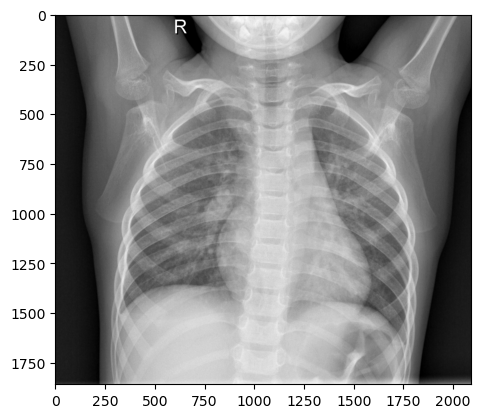

0


In [15]:
# viewing into the first image
plt.imshow(images[0], cmap='gray')
plt.show()
print(labels[0])

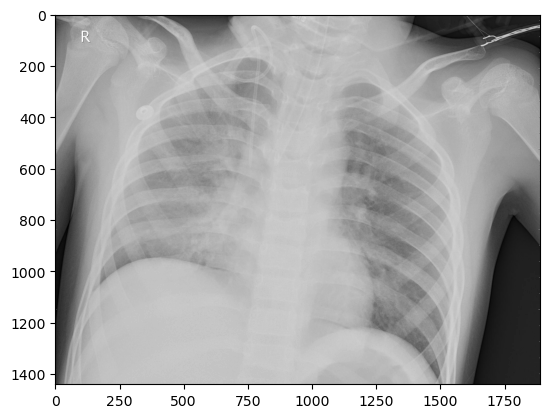

1


In [21]:
#viewing the 2000th image
plt.imshow(images[2000], cmap='gray')
plt.show()
print(labels[2000])

In [26]:
# checking the length of the images in the traintest
print(f"There are {len(images)} images in the training set")

There are 5216 images in the training set


In [27]:
# counting of normal images
normal_count = labels.count(0)

# counting of pneumonia images
pneumonia_count = labels.count(1)

print(f"Number of normal images: {normal_count}")
print(f"Number of pneumonia images: {pneumonia_count}")


Number of normal images: 1341
Number of pneumonia images: 3875


In [47]:
# specifying your paths for the validation set
paths = ["Data/val/NORMAL/", "Data/val/PNEUMONIA/"]

# creating a list to hold your images and labels
images_val = []
labels_val = []

# iterating over both directories
for path in paths:
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):  # or whatever file extension you're using
            img = Image.open(os.path.join(path, filename))
            images_val.append(img)
            # add a label for this image (1 for PNEUMONIA, 0 for NORMAL)
            if "PNEUMONIA" in path:
                labels_val.append(1)
            else:
                labels_val.append(0)


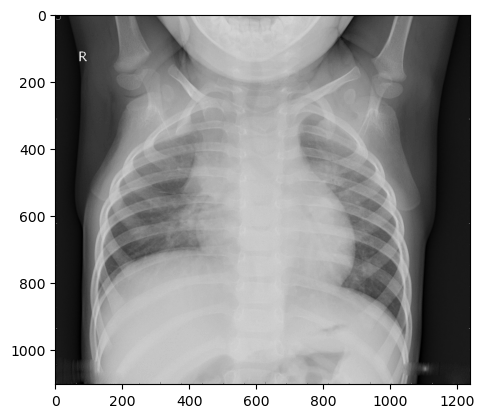

0


In [49]:
#viewing the fifth image in the validation set
plt.imshow(images_val[4], cmap='gray')
plt.show()
print(labels_val[4])


In [50]:
#checking image count in the validation set
print(f"There are {len(images_val)} images in the validation set set")


There are 16 images in the validation set set


In [51]:
# counting of normal images
normal_count = labels_val.count(0)

# counting of pneumonia images
pneumonia_count = labels_val.count(1)

print(f"Number of normal images: {normal_count}")
print(f"Number of pneumonia images: {pneumonia_count}")



Number of normal images: 8
Number of pneumonia images: 8


In [52]:
# specifying your paths for the test set
paths = ["Data/test/NORMAL/", "Data/test/PNEUMONIA/"]

# creating a list to hold your images and labels
images_test = []
labels_test = []

# iterating over both directories
for path in paths:
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):  # or whatever file extension you're using
            img = Image.open(os.path.join(path, filename))
            images_test.append(img)
            # add a label for this image (1 for PNEUMONIA, 0 for NORMAL)
            if "PNEUMONIA" in path:
                labels_test.append(1)
            else:
                labels_test.append(0)


In [53]:
#checking image count in the test set
print(f"There are {len(images_test)} images in the validation set set")


There are 624 images in the validation set set


In [54]:
# counting of normal images
normal_count = labels_test.count(0)

# counting of pneumonia images
pneumonia_count = labels_test.count(1)

print(f"Number of normal images: {normal_count}")
print(f"Number of pneumonia images: {pneumonia_count}")


Number of normal images: 234
Number of pneumonia images: 390


## 4.   Data wrangling